In [1]:
import urllib.request
import numpy as np
import warnings
import gzip
from io import StringIO
import matplotlib.pyplot as plt
import vamp
import librosa
import librosa.display as dsp
from divergence_function import KL, Euclidean, jsd, summary
#librosa.show_versions()

(1025, 10575)


Text(0.5, 1.0, 'Spectrogram')

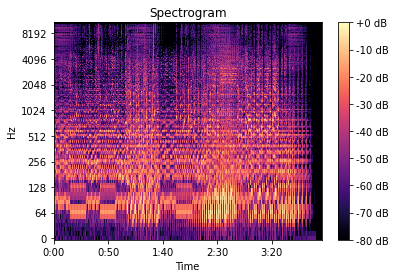

In [2]:
y, sr = librosa.load('04 Time After Time.wav')

#rhythm
spec = np.abs(librosa.stft(y, n_fft=2048, hop_length=512, window="hamming"))
spec = librosa.amplitude_to_db(spec, ref=np.max)
print(spec.shape)

librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram')


(36, 10575)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

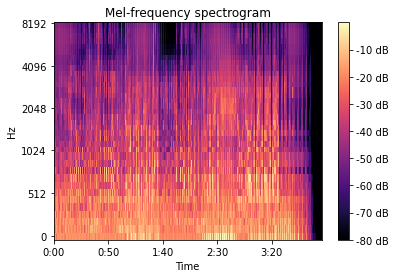

In [3]:
#timbre
timbre = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36, window="hamming")
print(timbre.shape)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(timbre, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


(12, 10575)


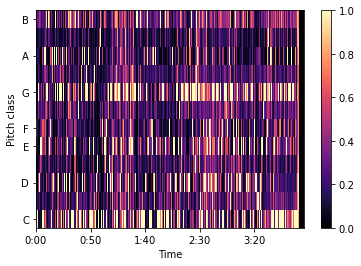

In [4]:
#chroma 
chroma = librosa.feature.chroma_stft(y=y, sr=11025)
print(chroma.shape)
'''
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
fig.colorbar(img, ax=[ax[1]])
'''
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
fig.colorbar(img)

In [16]:
#structural change

window_num = 6

rhythm_window = timbre_window = np.array([1,2,4,8,16,32])
chroma_window = np.array([4,8,16,32,64,128])

#calculate cumulative sum for each representation

rhythm_sum = np.cumsum(spec, axis=1)
timbre_sum = np.cumsum(timbre, axis=1)
chroma_sum = np.cumsum(chroma, axis=1)

#chroma structural change
chroma_sc = np.zeros((len(chroma_window), len(chroma_sum[0])))

for j, window_len in enumerate(chroma_window):
    for i in range(len(chroma_sum[0])):
        if i < window_len or len(chroma_sum[0]) - i <= window_len:
            continue
        #print(window_len)
        chroma_sc[j][i] = summary((chroma_sum[j][i-1] - chroma_sum[j][i-window_len-1]) / window_len,
                                  (chroma_sum[j][i+window_len] - chroma_sum[j][i]) / window_len)

print(chroma_sc)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
